In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [66]:
df = pd.read_csv("dataset\insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [67]:
df.shape

(1338, 7)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [69]:
df = df.drop_duplicates()

In [70]:
# Statistical information about the Numerical features
df.describe()

,age,bmi,children,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.665520,1.095737,13279.121638
std,14.044333,6.100664,1.205571,12110.359657
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9386.160000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,53.100000,5.000000,63770.430000


<font size="2">
    
- The expense range shows a large difference between the 75th percentile and the maximum value, indicating outliers.
    
- Approximately 50% of customers have one child. <font>

### EDA

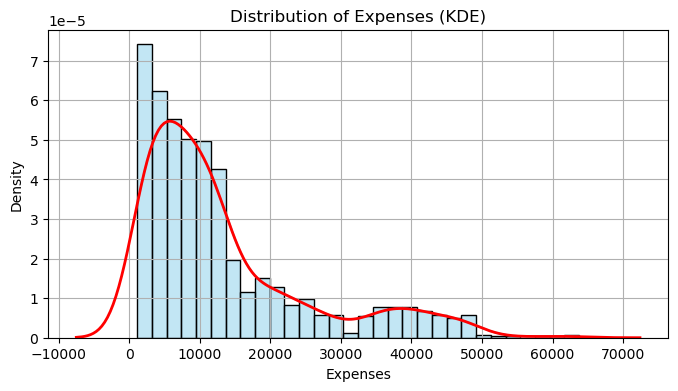

In [71]:
#Distribution of Expenses
plt.figure(figsize=(8,4))
sns.histplot(df['expenses'], bins=30, kde=True, color='skyblue', edgecolor='black', stat='density')
sns.kdeplot(df['expenses'], color='red', linewidth = 2)
plt.title('Distribution of Expenses (KDE)')
plt.xlabel('Expenses')
plt.ylabel('Density')
plt.grid()
plt.show()

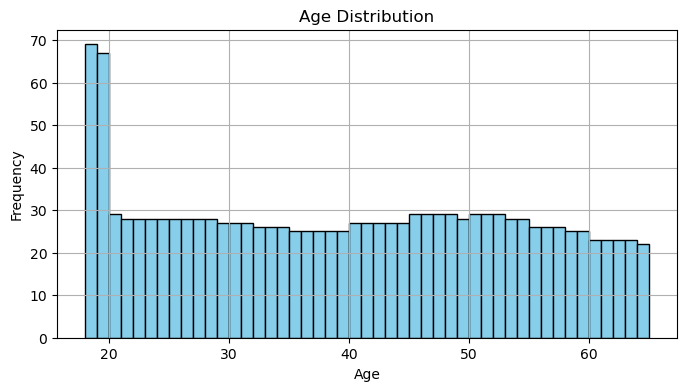

In [72]:
# Distribution of Age 
plt.figure(figsize=(8, 4))
plt.hist(df['age'], bins=range(18, 66), color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<font size ='2'>
The dataset exhibits a nearly uniform age distribution, with 20-30 customers for most ages. However, ages 18 and 19 stand out, having more than double the number of customers compared to other ages.
<font>

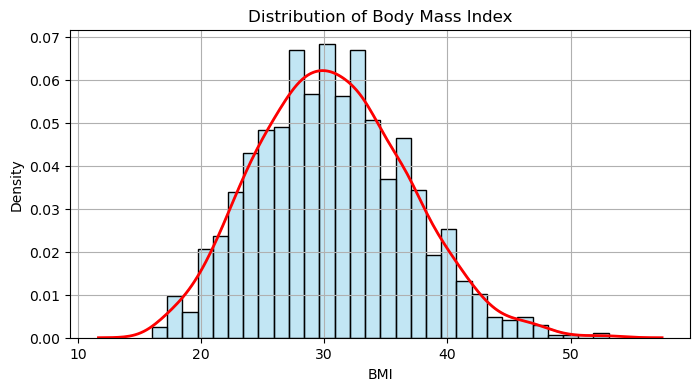

In [73]:
# Histogram with KDE of BMI
plt.figure(figsize=(8, 4))
sns.histplot(df['bmi'], bins=30, kde=True, color='skyblue', edgecolor='black', stat='density')
sns.kdeplot(df['bmi'], color='red', linewidth=2)
plt.title('Distribution of Body Mass Index')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.grid(True)
plt.show()

<font size = '2'> The body mass index measurements appear to follow a Gaussian distribution centered around 30, with some outliers on the right side. <font>

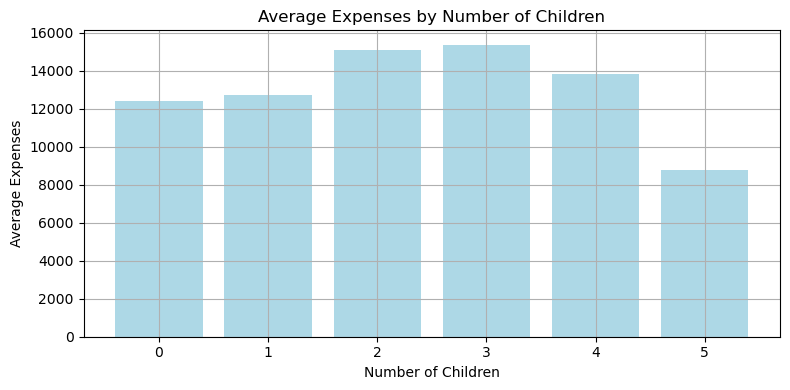

In [74]:
# Children impact on expenses
avg_expenses_children = df.groupby('children')['expenses'].mean().reset_index()

plt.figure(figsize=(8, 4))
plt.bar(avg_expenses_children['children'], avg_expenses_children['expenses'], color='lightblue')
plt.xlabel('Number of Children')
plt.ylabel('Average Expenses')
plt.title('Average Expenses by Number of Children')
plt.grid()

plt.tight_layout()
plt.show()

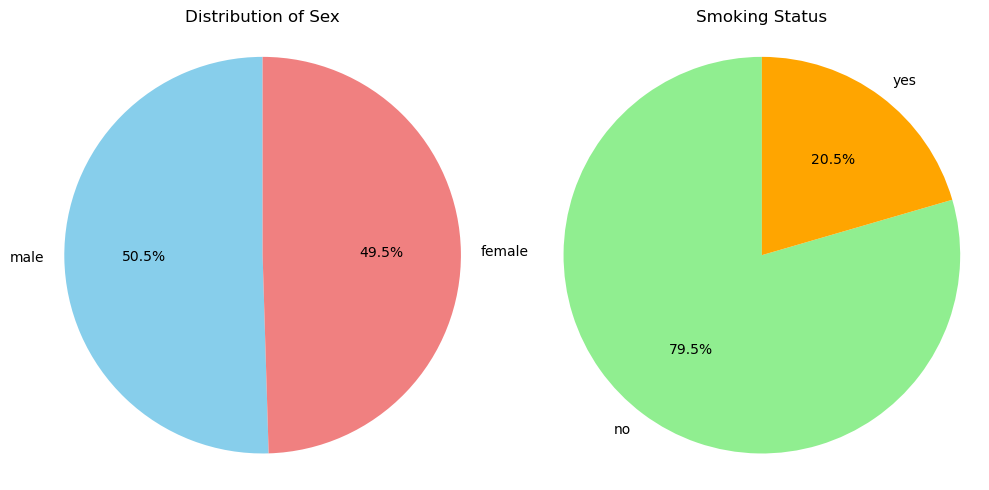

In [75]:
# Pie chart for Sex
sex_counts = df['sex'].value_counts()
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Sex')
plt.axis('equal')  

# Pie chart for Smoking
smoking_counts = df['smoker'].value_counts()
plt.subplot(1, 2, 2)  
plt.pie(smoking_counts, labels=smoking_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'orange'])
plt.title('Smoking Status')
plt.axis('equal') 

plt.tight_layout()  
plt.show()

<font size='2'> 
The gender distribution is nearly balanced, with males at 50.5% and females at 49.5%. Smoking prevalence is relatively low, with 20.5% of individuals identified as smokers. <font>

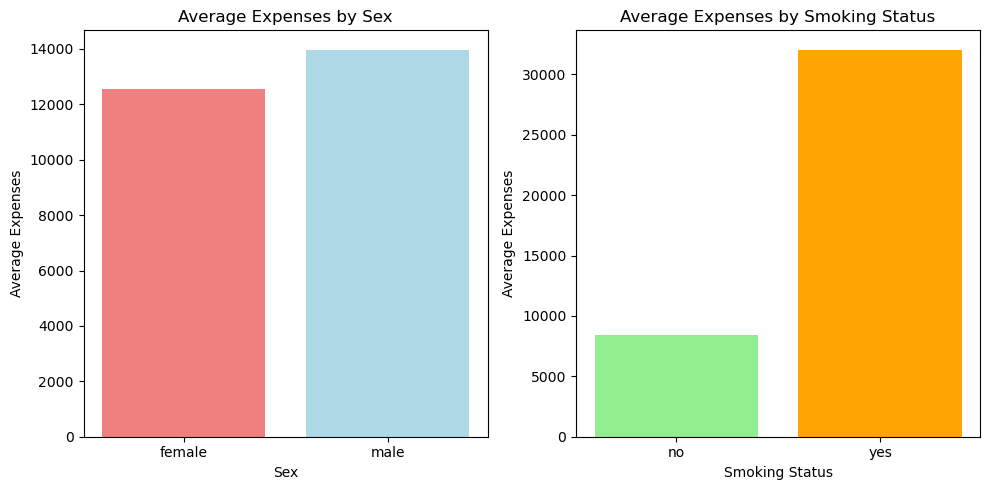

In [76]:
# Bar charts for average expenses by sex & smoking status
avg_expenses_sex = df.groupby('sex')['expenses'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  
plt.bar(avg_expenses_sex['sex'], avg_expenses_sex['expenses'], color=['lightcoral', 'lightblue'])
plt.xlabel('Sex')
plt.ylabel('Average Expenses')
plt.title('Average Expenses by Sex')



avg_expenses_smoking = df.groupby(['smoker'])['expenses'].mean().reset_index()

plt.subplot(1, 2, 2) 
plt.bar(avg_expenses_smoking['smoker'], avg_expenses_smoking['expenses'], color = ['lightgreen', 'orange'])
plt.xlabel('Smoking Status')
plt.ylabel('Average Expenses')
plt.title('Average Expenses by Smoking Status')

plt.tight_layout()
plt.show()

<font size='2'> Average expenses are similar for males and females, with males at approximately 14K and females around 12.5K. However, a significant difference emerges when examining smoking status, as non-smokers average about 8.4K, while smokers average around 32K. <font>    

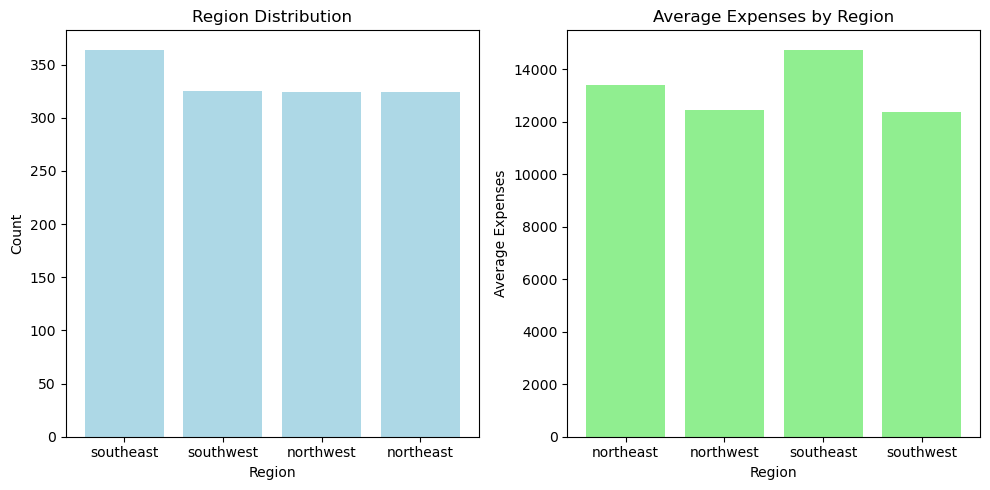

In [77]:
# Bar charts for region distribution and expenses vs region
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
regions = df['region'].value_counts()
plt.bar(regions.index, regions.values, color = 'lightblue')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Region Distribution')


plt.subplot(1,2,2)
avg_expenses_region = df.groupby(['region'])['expenses'].mean().reset_index()
plt.bar(avg_expenses_region['region'], avg_expenses_region['expenses'], color = 'lightgreen')
plt.xlabel('Region')
plt.ylabel('Average Expenses')
plt.title('Average Expenses by Region')

plt.tight_layout()
plt.show()

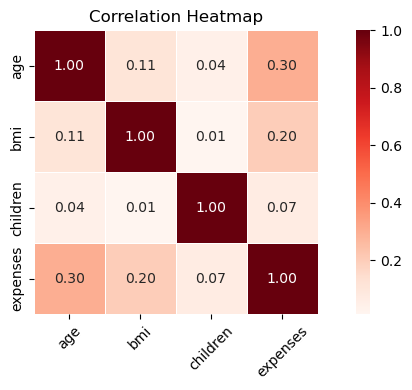

In [78]:
# Correlation matrix
correlation_matrix = df.corr(numeric_only = True)
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='Reds', square=True, linewidths=.5)

plt.title('Correlation Heatmap')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Data Preprocessing

In [79]:
numerical_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

In [80]:
# Apply StandardScaler to the numerical features ->  mean of 0 and standard deviation of 1
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Apply OneHotEncoder to the categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(df[categorical_features])

encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))
encoded_df.reset_index(drop=True, inplace=True)

df = pd.concat([df.drop(columns=categorical_features).reset_index(drop=True), encoded_df], axis=1)

In [81]:
df.head()

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.440418,-0.453484,-0.909234,16884.92,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-1.511647,0.513986,-0.079442,1725.55,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.799350,0.382803,1.580143,4449.46,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.443201,-1.306169,-0.909234,21984.47,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.514431,-0.289506,-0.909234,3866.86,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [82]:
# Separate the dataset into features and the target
X = df.drop(['expenses'], axis = 1)
y = df[['expenses']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (1069, 11)
Size of y_train :  (1069, 1)
Size of X_test :  (268, 11)
Size of Y_test :  (268, 1)


### Model Training and Evaluation

<font size="2">
To evaluate our model's predictions, calculate the residuals by finding the difference between actual and predicted values, square them, compute their average, and take the square root to obtain the root mean squared error (RMSE). 
Mathematically, this can be expressed as follows:
    
    
$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

where:
- **n** is the number of observations,
- **y<sub>i</sub>** is the actual value,
- **ŷ<sub>i</sub>** is the predicted value.
    
</font>


<font size='2'>
The R² score, or coefficient of determination, quantifies how well independent variables explain the variability of the dependent variable in a regression model. 

Interpretation:
- **0**: The model explains none of the variability in the response data.
- **1**: The model explains all the variability in the response data.
- **Values between 0 and 1**: Indicate the proportion of variability explained by the model; higher values signify a better fit.
<font>

In [83]:
# Create and train the linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)

linear_reg_mse = mean_squared_error(y_test, y_pred)  
linear_reg_rmse = mean_squared_error(y_test, y_pred, squared=False)  
linear_reg_r2_score = r2_score(y_test, y_pred)  

print("Linear Regression Mean Squared Error (MSE): {:.4f}".format(linear_reg_mse))
print("Linear Regression Root Mean Squared Error (RMSE): {:.4f}".format(linear_reg_rmse))
print("Linear Regression R-squared Score: {:.4f}".format(linear_reg_r2_score))


Linear Regression Mean Squared Error (MSE): 35481471.5959
Linear Regression Root Mean Squared Error (RMSE): 5956.6326
Linear Regression R-squared Score: 0.8069


In [84]:
# Create and train the Decision Tree model
decision_tree = DecisionTreeRegressor(max_depth=5, min_samples_split=5, random_state=42)
decision_tree.fit(X_train, y_train)

y_pred_dt = decision_tree.predict(X_test)

dt_mse = mean_squared_error(y_test, y_pred_dt)  
dt_rmse = mean_squared_error(y_test, y_pred_dt, squared=False)  
dt_r2_score = r2_score(y_test, y_pred_dt) 

print("Decision Tree Mean Squared Error (MSE): {:.4f}".format(dt_mse))
print("Decision Tree Root Mean Squared Error (RMSE): {:.4f}".format(dt_rmse))
print("Decision Tree R-squared Score: {:.4f}".format(dt_r2_score))

Decision Tree Mean Squared Error (MSE): 19684522.3747
Decision Tree Root Mean Squared Error (RMSE): 4436.7243
Decision Tree R-squared Score: 0.8929


In [85]:
# Create and train the Random Forest model
random_forest = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
random_forest.fit(X_train, y_train.values.ravel())

y_pred_rf = random_forest.predict(X_test)

rf_mse = mean_squared_error(y_test, y_pred_rf)  
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)  
rf_r2_score = r2_score(y_test, y_pred_rf)  

print("Random Forest Mean Squared Error (MSE): {:.4f}".format(rf_mse))
print("Random Forest Root Mean Squared Error (RMSE): {:.4f}".format(rf_rmse))
print("Random Forest R-squared Score: {:.4f}".format(rf_r2_score))

Random Forest Mean Squared Error (MSE): 18079869.5957
Random Forest Root Mean Squared Error (RMSE): 4252.0430
Random Forest R-squared Score: 0.9016


In [86]:
# Create and train the Gradient Boosting model
gradient_boost = GradientBoostingRegressor()
gradient_boost.fit(X_train, y_train.values.ravel())

y_pred_gb = gradient_boost.predict(X_test)

gb_mse = mean_squared_error(y_test, y_pred_gb)  
gb_rmse = mean_squared_error(y_test, y_pred_gb, squared=False)  
gb_r2_score = r2_score(y_test, y_pred_gb) 

print("Gradient Boosting Mean Squared Error (MSE): {:.4f}".format(gb_mse))
print("Gradient Boosting Root Mean Squared Error (RMSE): {:.4f}".format(gb_rmse))
print("Gradient Boosting R-squared Score: {:.4f}".format(gb_r2_score))

Gradient Boosting Mean Squared Error (MSE): 19004814.5184
Gradient Boosting Root Mean Squared Error (RMSE): 4359.4512
Gradient Boosting R-squared Score: 0.8966


In [87]:
# Summarize model performance
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest',
              'Gradient Boosting'],
    'RMSE': [linear_reg_rmse, dt_rmse, rf_rmse,
             gb_rmse],
    'R² Score': [linear_reg_r2_score, dt_r2_score, rf_r2_score, 
                 gb_r2_score]
})


models.sort_values(by='RMSE', ascending=True)


,Model,RMSE,R² Score
2,Random Forest,4252.042991,0.901609
3,Gradient Boosting,4359.451172,0.896576
1,Decision Tree,4436.724284,0.892877
0,Linear Regression,5956.632572,0.806910


<font size='2'>
Based on the observations, the Random Forest model demonstrates superior performance in terms of RMSE and R-squared. We will save the Random Forest model for further usage with the pickle library.

Additionally, the performance of the other models can be improved by exploring various hyperparameter combinations using GridSearchCV to identify the best-performing model for future applications.
<font>

In [88]:
data = {'model': random_forest, 'encoder': encoder, 'scaler': scaler}
with open('saved_model.pkl', 'wb') as file:
    pickle.dump(data, file)

In [89]:
with open('saved_model.pkl', 'rb') as file:
        data = pickle.load(file)